# Aula 03 - Métodos de Ensemble (Parte I)

Imaginemos a seguinte situação: precisamos modelar as vendas de um determinado produto para fazer previsões, o mais precisas quanto possível, das vendas por mês. Como poderíamos abordar este problema?

Em um primeiro momento, poderíamos, por exemplo, pensar em utilizar a média de vendas em um determinado período (por exemplo, nos últimos 12 meses) como o valor a ser predito todos os meses. No entanto, é evidente que a performance desta abordagem deixaria muito a desejar, já que estaríamos simplesmente "chutando" a média de vendas o tempo todo. Contudo, pode nos servir como ponto de partida, e levantar o seguinte questionamento: *e se utilizássemos os erros do modelo como novas informações para o treinamento de um outro modelo?**

Este é o princípio do **boosting:** utilizamos os erros no aprendizado de um modelo para treinar modelos subsequentes. Deste modo, a ideia é que "os modelos passem a aprender com os erros passados" e possa, assim, conjuntamente, performar melhor. Ou seja: *mesmo que a performance de cada um dos estimadores, individualmente, não seja boa, em conjunto, com o boosting, eles deveriam prover uma performance mais satisfatória!*

# "Trabalho em conjunto": Bagging x Boosting

Temos algumas maneiras de criar *comitês* de estimadores. A um grupo de modelos atuando conjuntamente, seja para fins de classificação ou regressão, chamamos comumente de **ensemble** (conjunto). A ideia de utilizar diversos estimadores conjuntamente tem por **objetivo combinar modelos mais simples em um único modelo mais robusto, a fim de reduzir o viés, a variância e/ou aumentar a acurácia**.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Algumas conceitualizações...</h2>
<ul>
<li>Podemos dizer que um modelo é um <b>weak learner</b> quando sua performance não é muito além de um "chute aleatório". <br><br>
    <li>Por outro lado, um <b>strong learner</b> possui alta performance e boa capacidade de generalização;<br><br>
<li>A ideia de métodos de ensemble é <b>combinar vários classificadores weak learners<\b> para gerar boas performances a custos computacionais mais baixos.
</ul>
</span>
<br>
</div>

## Alguns tipos de Ensemble:
- __1. Bagging (short for bootstrap aggregation)__: Treina paralelamente $N$ modelos mais fracos (geralmente do mesmo tipo) com $N$ subsets distintos criados com amostragem randômica e reposição. Cada modelo é avaliado na fase de teste com o label definido pela moda (classificação) ou pela média dos valores (regressão). Os métodos de Bagging reduzem a variância da predição. <br>
Algoritimos  famosos: Random Forest <br>
<img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*_pfQ7Xf-BAwfQXtaBbNTEg.png' style="width:600px"  text="https://miro.medium.com/v2/resize:fit:828/format:webp/1*_pfQ7Xf-BAwfQXtaBbNTEg.png" />  
<br>
<br>
- __2. Boosting__: Treina $N$ modelos mais fracos (geralmente do mesmo tipo) de **forma sequencial**. Os pontos que foram classificados erroneamente recebem um peso maior para entrar no próximo modelo. Na fase de teste, cada modelo é avaliado com base do erro de teste de cada modelo, e a predição é feita com um peso sobre a votação. Os métodos de Boosting reduzem o viés da predição. <br>
Algoritimos  famosos: AdaBoost, Gradient Boosting, XGBoost, CatBoost, LightGBM (Light Gradient Boosting Machine) <br>
<img src='https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png' style="width:600px" text="Fonte: https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" />
<br>
<br>

##### Algumas leituras complementares:
[What is the difference between Bagging and Boosting?](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)

[Bagging vs Boosting in Machine Learning](https://www.geeksforgeeks.org/bagging-vs-boosting-in-machine-learning/)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## VOTING CLASSIFIER

In [5]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df["species"].value_counts(dropna = False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [9]:
df["species"].value_counts(dropna = False, normalize = True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [10]:
df1 = df.dropna()
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [15]:
X =  df1.select_dtypes(include = np.number)
y = df1[["species"]]

In [16]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [47]:
# modelo de voting 

## instanciar nossos modelos de classificação
lr = LogisticRegression(random_state = 2, solver = "lbfgs")
svc = SVC(random_state = 2, max_iter = 10000, kernel = "poly", degree = 5, C = 10000)

modelo = VotingClassifier(
    [
        ("lr", lr), 
        ("svc", svc)
    ]
)

In [48]:
modelo.fit(X_train,y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

C:\Users\r-omd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-omd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\r-omd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

TREINO
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97       117
   Chinstrap       1.00      0.89      0.94        54
      Gentoo       1.00      0.99      0.99        95

    accuracy                           0.97       266
   macro avg       0.98      0.96      0.97       266
weighted avg       0.98      0.97      0.97       266



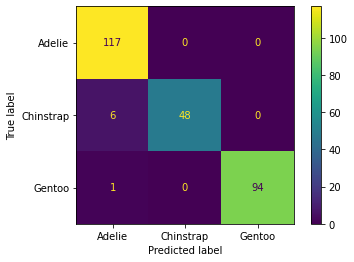



TESTE
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        29
   Chinstrap       1.00      0.86      0.92        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.98      0.95      0.96        67
weighted avg       0.97      0.97      0.97        67



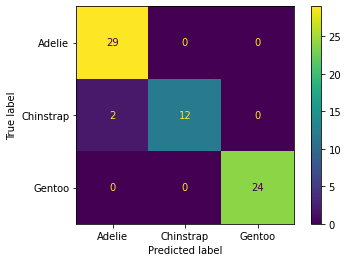

In [50]:
print("TREINO")
print(classification_report(y_train, y_pred_train))
print(ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train))
plt.show()

print("\n")
print("TESTE")
print(classification_report(y_test, y_pred_test))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test))

# Boosting : AdaBoost

O AdaBoost significa **Adaptive Boosting**, e tem como procedimento geral **a criação sucessiva dos chamados weak learners**, que são modelos bem fracos de aprendizagem - geralmente, **árvores de um único nó (stumps)**.

<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>

O AdaBoost utiliza os **erros da árvore anterior para melhorar a próxima árvore**. As predições finais são feitas com base **nos pesos de cada stump**, cuja determinação faz parte do algoritmo!

<img src="https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png" width=700>

Vamos entender um pouco melhor...

Aqui, o bootstrapping não é utilizado: o método começa treinando um classificador fraco **no dataset original**, e depois treina diversas cópias adicionais do classificador **no mesmo dataset**, mas dando **um peso maior às observações que foram classificadas erroneamente** (ou, no caso de regressões, a observações **com o maior erro**).

Assim, após diversas iterações, classificadores/regressores vão sequencialmente "focando nos casos mais difíceis", e construindo um classificador encadeado que seja forte, apesar de utilizar diversos classificadores fracos em como elementos fundamentais.

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>

De forma resumida, as principais ideias por trás deste algoritmo são:

- O algoritmo cria e combina um conjunto de **modelos fracos** (em geral, stumps);
- Cada stump é criado **levando em consideração os erros do stump anterior**;
- Alguns dos stumps têm **maior peso de decisão** do que outros na predição final;

As classes no sklearn são:

- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Note que não há muitos hiperparâmetros. O mais importante, que deve ser tunado com o grid/random search, é:

- `n_estimators` : o número de weak learners encadeados;

Além disso, pode também ser interessante tunar os hiperparâmetros dos weak learners. Isso é possível de ser feito, como veremos a seguir!


# Exercício

Em grupos, trabalhem sobre o dataset 'german_credit_data' para tentar melhorar a performance do modelo com o adaboost. Que maneiras vocês enxergam de fazê-lo? Como implementá-las?

In [51]:
import pandas as pd
df = pd.read_csv('german_credit_data.csv', index_col = 0)


In [52]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
